# Bollinger Bands

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
def download_data(stock, start, end):
    data = yf.download(stock, start, end)
    return pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


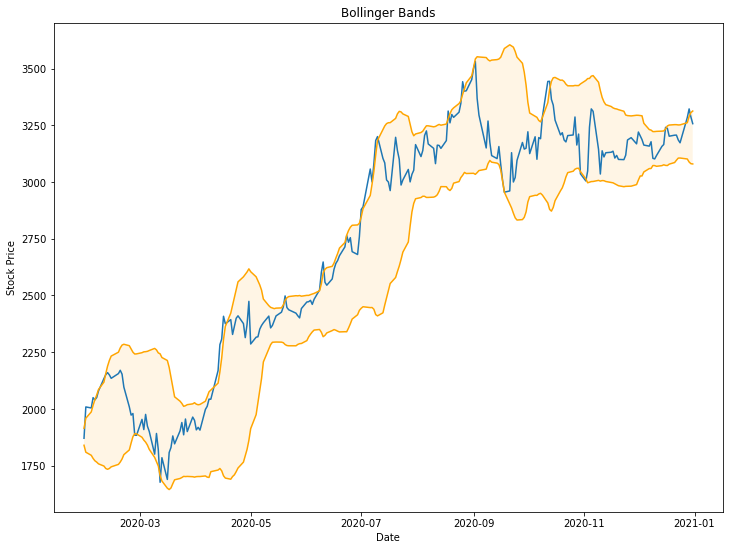

In [8]:
if __name__ == "__main__":
    start_date = datetime.datetime(2020, 1, 1)
    end_date   = datetime.datetime(2021,1, 1)
    
    stock_data = download_data('AMZN', start_date, end_date)
    
    # calculate the Bollinger bands
    stock_data['tp'] = (stock_data['Close'] +  stock_data['Low'] + stock_data['High']) / 3 # typical price
    stock_data['std'] = stock_data['tp'].rolling(20).std()
    stock_data['ma'] = stock_data['tp'].rolling(20).mean()
    stock_data['upper_band'] = stock_data['ma'] + 2*stock_data['std']
    stock_data['lower_band'] = stock_data['ma'] - 2*stock_data['std']
    
    stock_data = stock_data.dropna()
    
    # plot Bollinger bands
    plt.figure(figsize=(12,9))
    plt.plot(stock_data['Close'])
    plt.plot(stock_data['upper_band'], color='orange')
    plt.plot(stock_data['lower_band'], color='orange')
    plt.fill_between(stock_data.index, stock_data['upper_band'], stock_data['lower_band'], facecolor='orange', alpha=0.1)
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()